# Visualizing Ford GoBike Data

## Investigation Overview

In this investigation of the Ford GoBike System, I wanted to look at the most common customer behaviors and characteristics, specifically how user type, time, gender, and age impacts usage of the system.

## Dataset Overview
Ford GoBike is a regional public bike sharing system in Bay Area.It started in the year 2013 and has been successfull all over these years.
The most important thing is that the bikes are available 24/7 on all the days irrespective of what day it is.There are two types of users, subscribers and general customers.

In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import requests
import datetime
import zipfile

from os import path, getcwd, makedirs, listdir

%matplotlib inline

In [2]:
df_clean = pd.read_csv("master_file.csv")
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_week,start_day,start_hour,user_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,February,Thu,28,17,36.0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,February,Thu,28,12,48.0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,February,Thu,28,17,31.0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,February,Thu,28,23,46.0
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,February,Thu,28,23,61.0


## No. of users by considering age

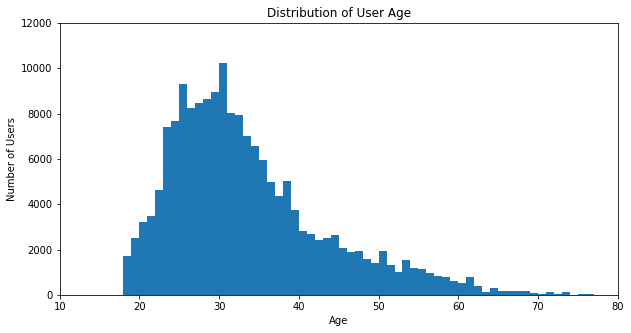

In [3]:
# Plotting age distribution derived from member's birth year.
bins = np.arange(0, df_clean['member_birth_year'].astype(float).max()+1, 1)

plt.figure(figsize=[10, 5])
plt.hist(data = df_clean.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

## Usage of Bikes weekly

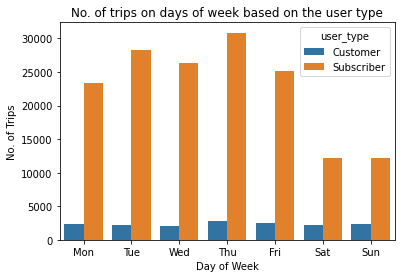

In [10]:
# Weekly usage of the bike sharing system per user type
sns.countplot(data=df_clean, x='start_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('No. of Trips');
plt.title("No. of trips on days of week based on the user type");

The graph shows that there is a difference in No. of trips for different user types.For Customers, as they may travel ocassionally and would use bikes on holidays.But when it comes to the subcribers, they use this daily to go to work/school and would not use it during weekends as there would be holidays.

## No. of trips by user_type

In [5]:
# Calculation of % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].shape[0]
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].shape[0]

customer_proportion = customer / df_clean['bike_id'].shape[0]
subscriber_proportion = subscriber / df_clean['bike_id'].shape[0]

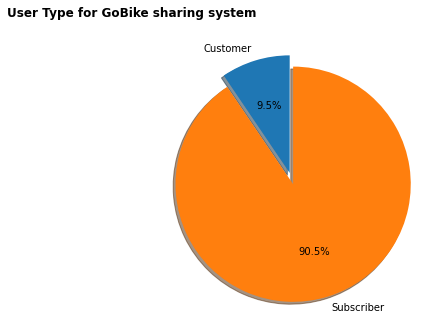

In [6]:
plt.figure(figsize = [10, 5])

# Pie Chart for User Type
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User Type for GoBike sharing system',fontweight='bold');

This clearly shows that there are huge number of subscribers when compared to customers who use bike share service.

## Daily and weekly habits by subscription type

**Customer:** <br>
The heatmap shows that Cutomer uses the service all the days randomly and would travel any time in the day from 8am - 6pm.


**Subscribers:** <br>
They use the bike sharing service regularly during weekdays and less during weekends.The starting time is highly shaded near 8-9am and end time at around 5-6pm.

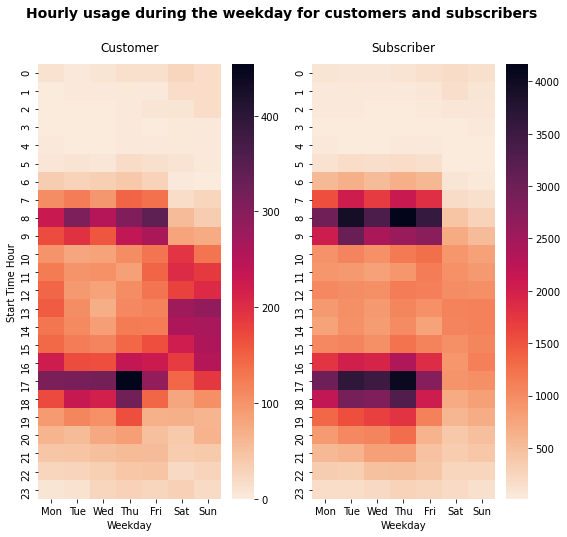

In [7]:
# Week order
df_clean['start_week'] = pd.Categorical(df_clean['start_week'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')
# Heat Map for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_hour", "start_week"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_hour", "start_week", "bike_id")
sns.heatmap(df_customer, cmap="rocket_r")
plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')
# HeatMap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_hour", "start_week"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_hour", "start_week", "bike_id")
sns.heatmap(df_subscriber, cmap="rocket_r")
plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Lenght of trips by subscription type
There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

/home/abhishek/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


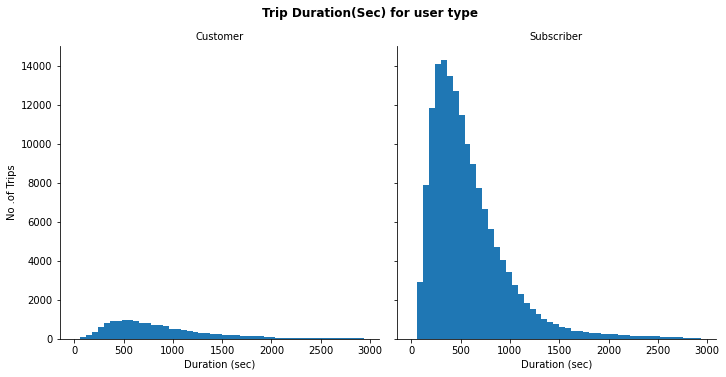

In [8]:
# Histogram for Duration(Sec) for User Types
base_color  = sns.color_palette()[0]
g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3000,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "No .of Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip Duration(Sec) for user type', y=1.04,fontweight='bold');

## Summary

Renting a bike from Ford GoBike System is a fantastic (healthy and environmentally friendly) way of moving around in urban areas, both for pleasure and work. There are two types of clients using the system: Subscribers utilise the service mainly in weekdays and more often at two partivular time intevals which would have been because of the wirk timings. Whereas customers, they are not much in number when compared to subscribers and they utilise this service when required and would travel for a high trip duration when compared to subscribers.